In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"E:\Chorme Downloads\Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

0

replacing total charges blanks with 0 as the tenure is 0

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype('float')

In [8]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


converted senoir citizen values 0,1 to yes and no

In [11]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)


In [12]:
df['SeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: SeniorCitizen
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [13]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Churn Customers')

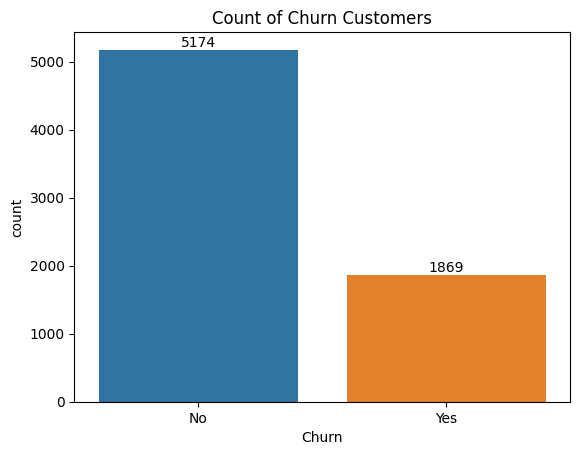

In [27]:
ax=sns.countplot(data=df,x=df['Churn'])
ax.bar_label(ax.containers[0])
plt.title('Count of Churn Customers')

Churn ratio

<Figure size 300x400 with 0 Axes>

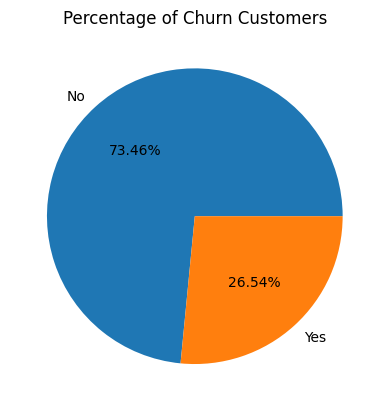

<Figure size 300x400 with 0 Axes>

In [31]:
chrun_count=df['Churn'].value_counts()
plt.pie(chrun_count,labels=chrun_count.index,  autopct='%1.2f%%')
plt.title('Percentage of Churn Customers')
plt.figure(figsize=(3,4))

There is no relation between genders.

Text(0.5, 1.0, 'Churn by Gender')

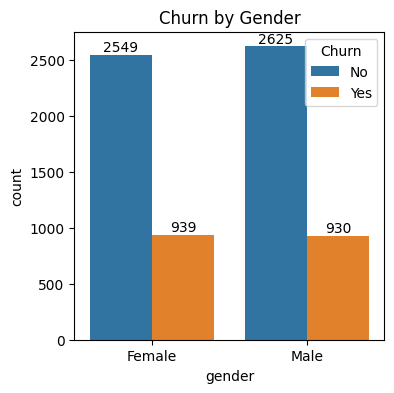

In [77]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=df,x=df['gender'],hue=df['Churn'])

for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by Gender')

Senior citizens are lesser comparing to elders.

Text(0.5, 1.0, 'Churn by Senoir CItizen')

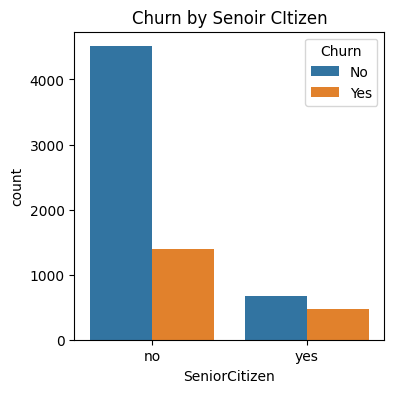

In [37]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=df,x=df['SeniorCitizen'],hue=df['Churn'])
plt.title('Churn by Senoir CItizen')

Text(0.5, 1.0, 'Count of Senior Citizens')

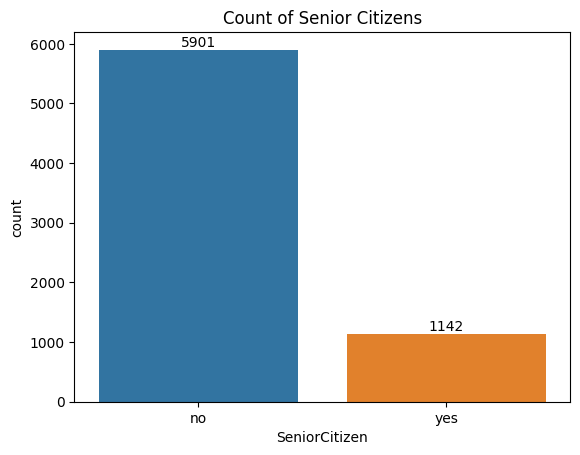

In [43]:
ax=sns.countplot(data=df,x=df['SeniorCitizen'])
ax.bar_label(ax.containers[0])
plt.title('Count of Senior Citizens')

Senior Citizens are more likely to churn.

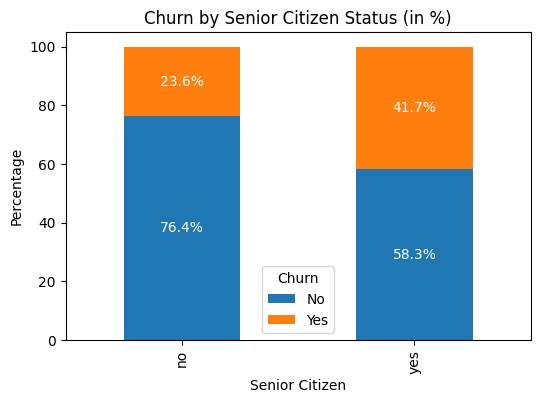

In [ ]:
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_churn = senior_churn.apply(lambda x: x / x.sum() * 100, axis=1)  

fig, ax = plt.subplots(figsize=(6, 4))

senior_churn.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
plt.title('Churn by Senior Citizen Status (in %)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            f'{height:.1f}%', 
            ha='center', 
            va='center', 
            color='white')

plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Most of the customers are churned in intial days of service 

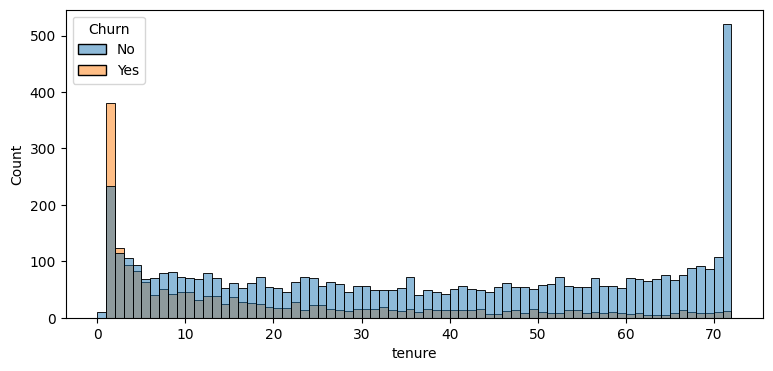

In [52]:

plt.figure(figsize=(9, 4))
sns.histplot(data=df,x=df['tenure'],bins=72,hue=df['Churn'])
plt.show()

Most people who have taken monthly subscriptions have a higher churn rate

Text(0.5, 1.0, 'Churn by Contract')

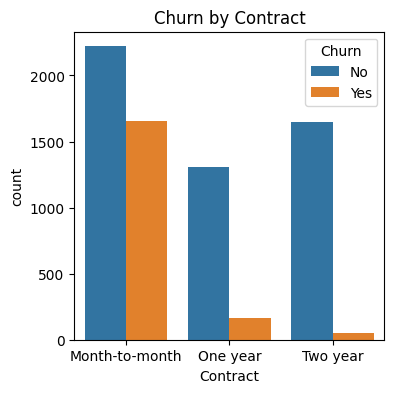

In [53]:
plt.figure(figsize=(4,4))
ax=sns.countplot(data=df,x=df['Contract'],hue=df['Churn'])
plt.title('Churn by Contract')

In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
cols=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',]


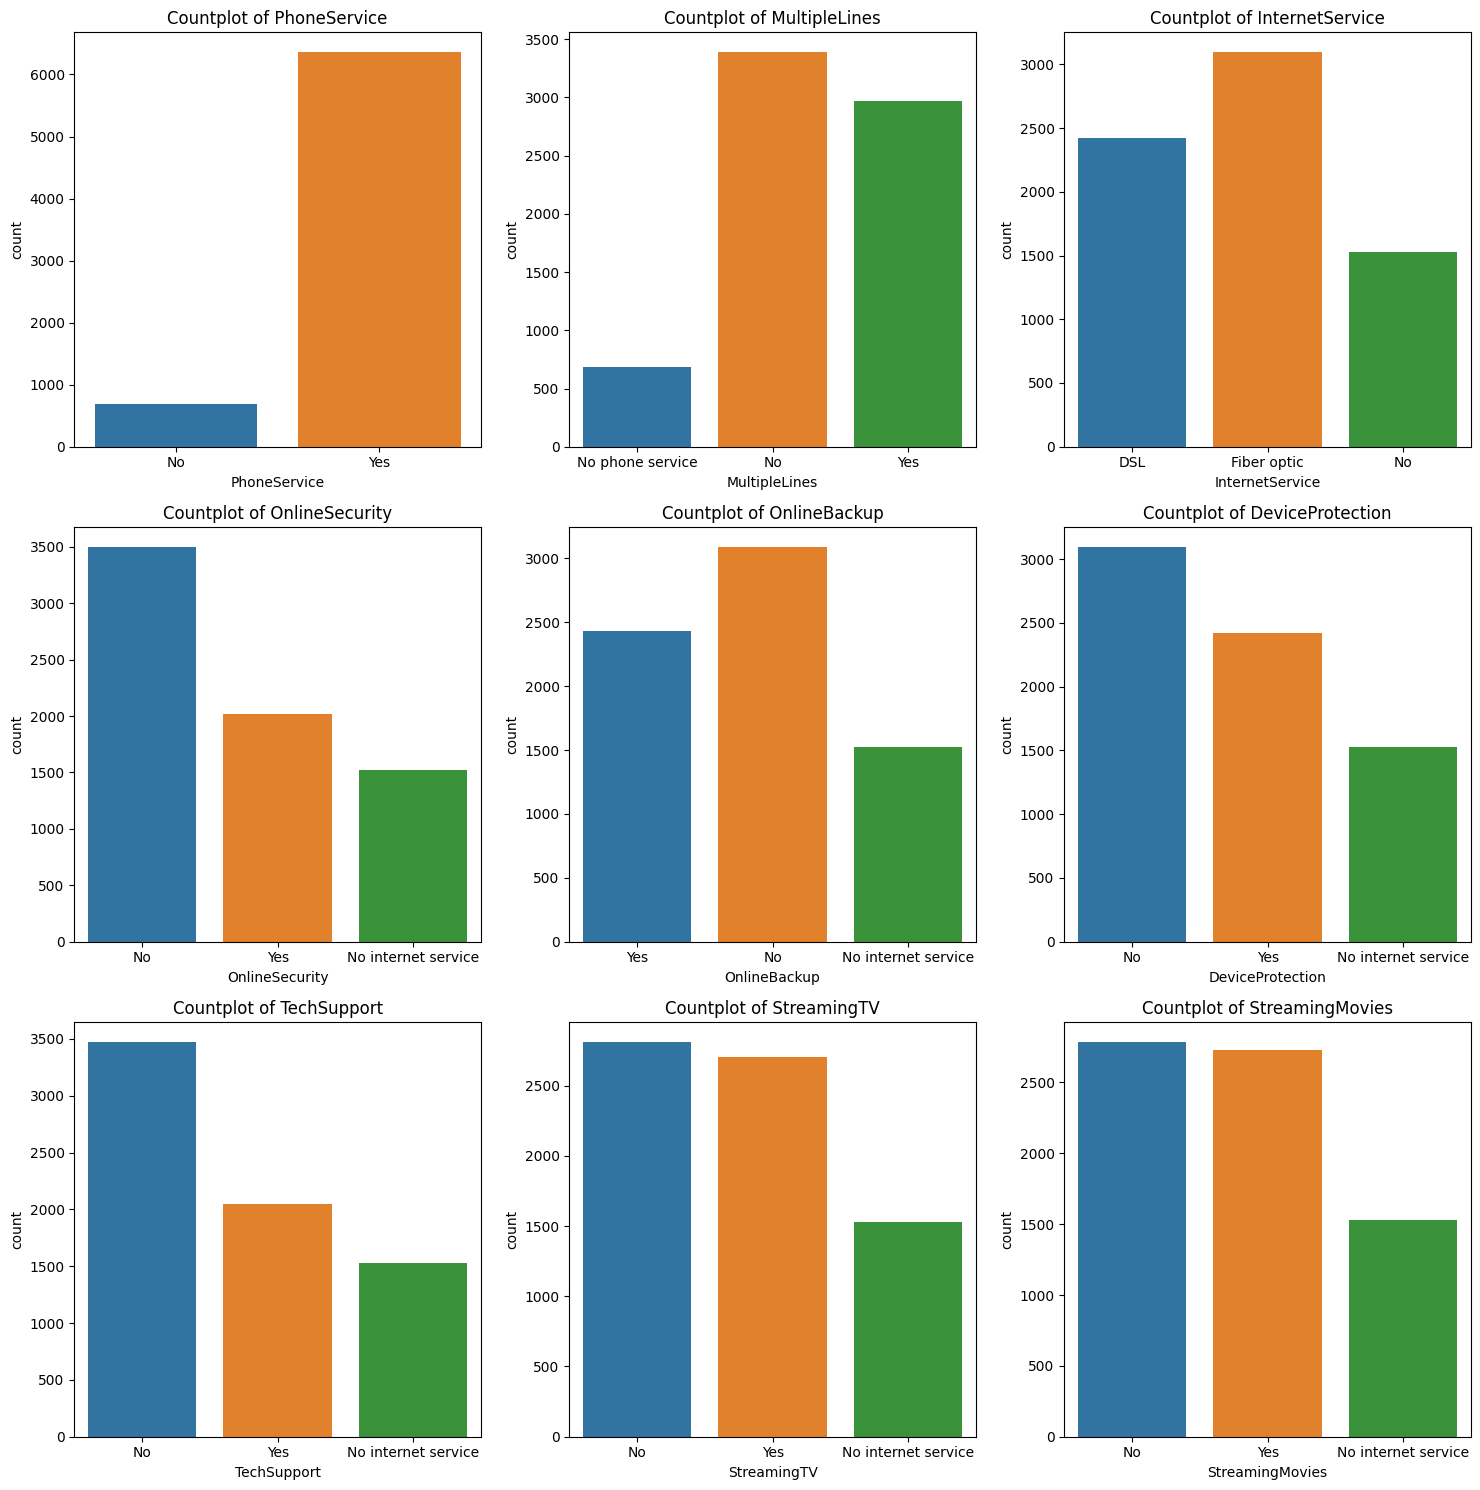

In [72]:
n_cols = len(cols)

# Set up subplots, with 3 columns per row for better organization
n_rows = (n_cols + 2) // 3  # Calculate the required number of rows
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes array to easily iterate

# Plot each countplot on a separate subplot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

# Remove any empty subplots (if n_cols is not a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

Fiber Optic Internet, lack of support services, and lack of security/backup services are associated with higher churn rates.

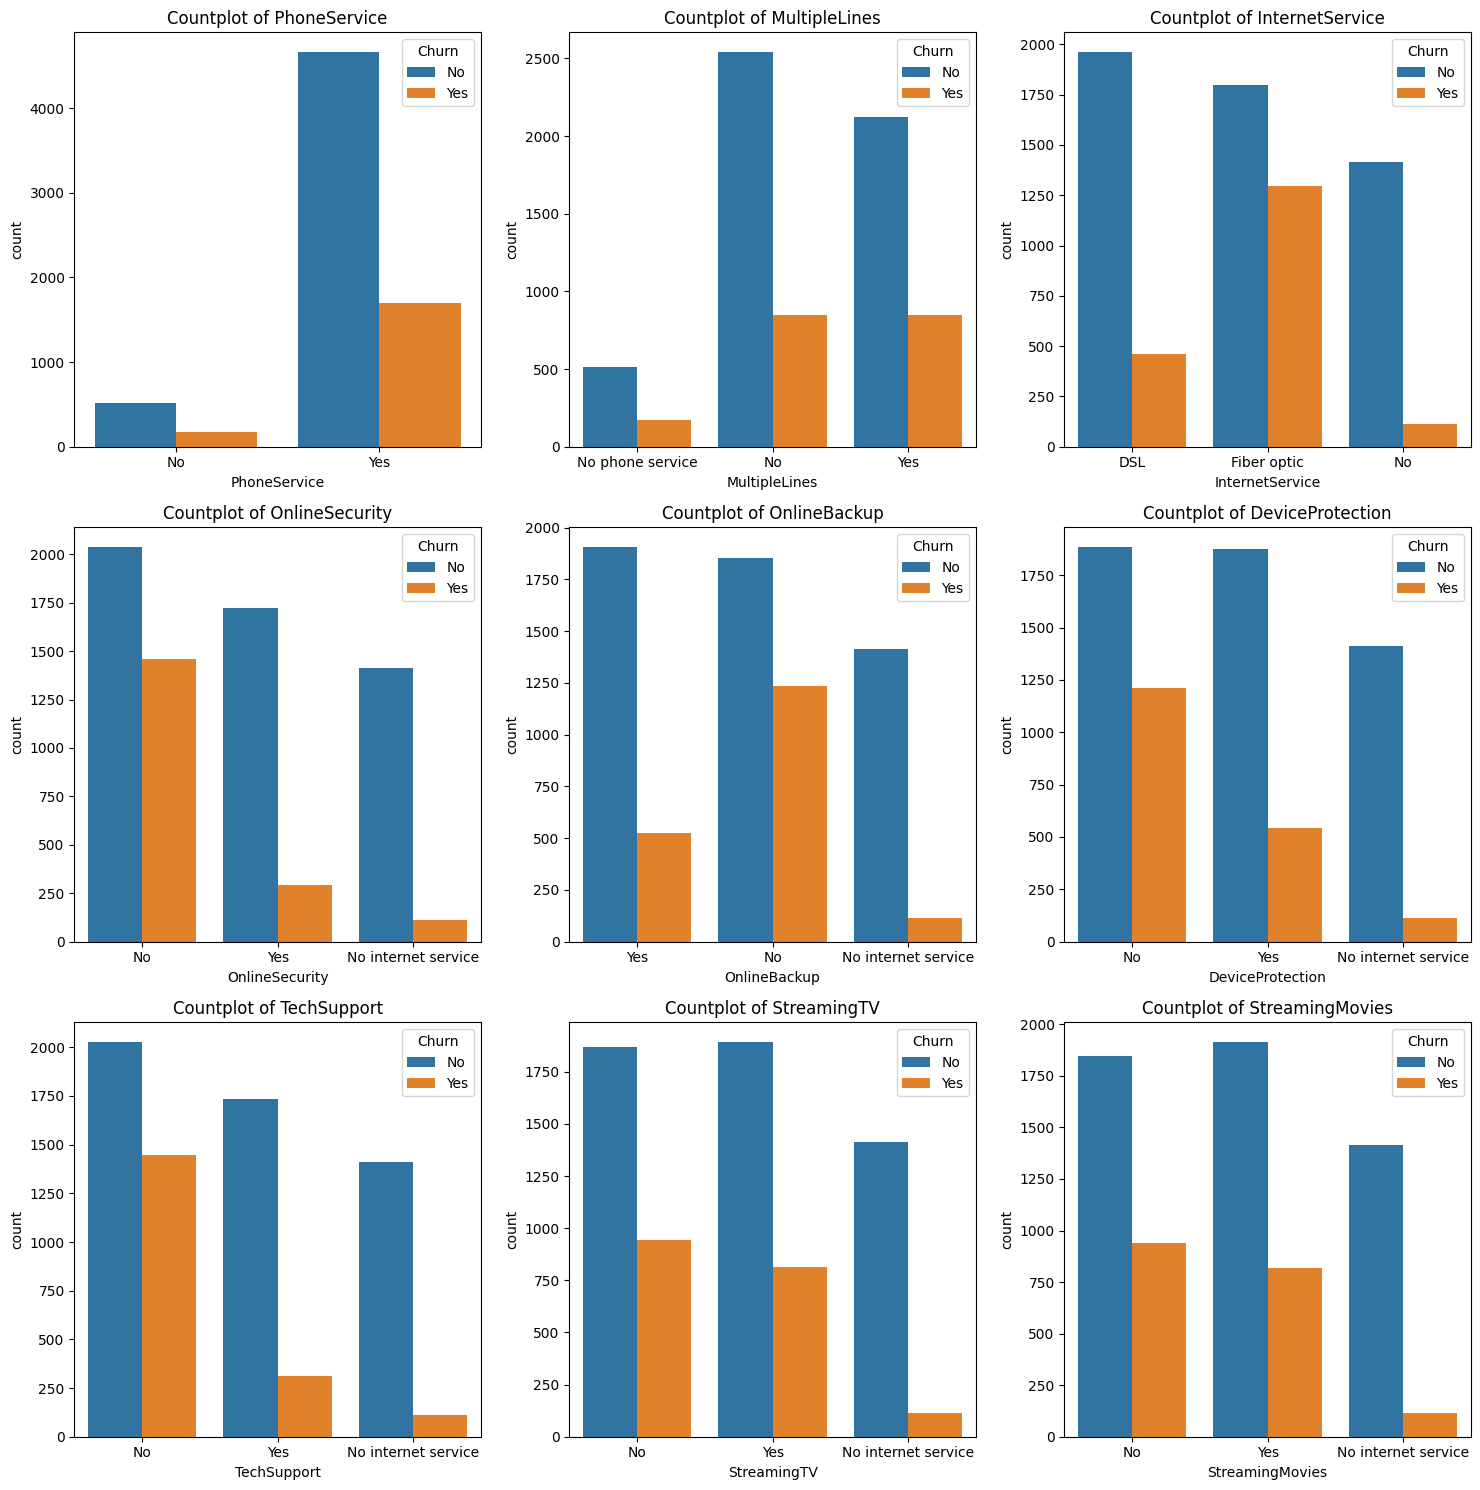

In [73]:
n_cols = len(cols)

# Set up subplots, with 3 columns per row for better organization
n_rows = (n_cols + 2) // 3  # Calculate the required number of rows
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes array to easily iterate

# Plot each countplot on a separate subplot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Countplot of {col}')

# Remove any empty subplots (if n_cols is not a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

Electronic Check payment method resulting higher rate of churn.

Text(0.5, 1.0, 'Churn by Payment Method')

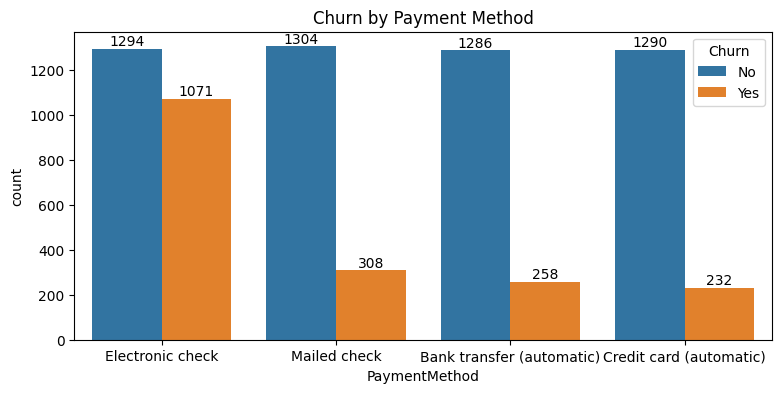

In [78]:
plt.figure(figsize=(9,4))
ax=sns.countplot(data=df,x=df['PaymentMethod'],hue=df['Churn'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn by Payment Method')